In [ ]:
!java -version
 
#Install Spark
#download file
!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
#extract the file
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
#install findspark package
!pip install -q findspark
 
import os
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"
def install_java():
  !pip install pyodbc
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()
 
!curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
 
#Download appropriate package for the OS version
#Choose only ONE of the following, corresponding to your OS version
 
#Ubuntu 18.04
!curl https://packages.microsoft.com/config/ubuntu/18.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
 
 
 
!apt-get update
!ACCEPT_EULA=Y apt-get install -y msodbcsql17
# optional: for bcp and sqlcmd
!ACCEPT_EULA=Y apt-get install -y mssql-tools
!echo 'export PATH="$PATH:/opt/mssql-tools/bin"' >> ~/.bashrc
!source ~/.bashrc
# optional: for unixODBC development h

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
     |████████████████████████████████| 280 kB 5.0 MB/s 
  Created wheel for pyodbc: filename=pyodbc-4.0.31-cp37-cp37m-linux_x86_64.whl size=286824 sha256=578826c2b2aad0e4769b203324c5274d605a23e4090822ebfcff43d0aaf588da
  Stored in directory: /root/.cache/pip/wheels/b6/90/83/0d14028dd261d703154631f91543fbadae0e5e7247501489d9
Successfully built pyodbc
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   983  100   983    0     0   5921      0 --:--:-- --:--:-- --:--:--  5921
OK
  % Total    % Received %

In [ ]:
import findspark
findspark.init()

# create entry points to spark
try:
    sc.stop()
except:
    pass
import pyodbc
conn = pyodbc.connect(DRIVER = '{ODBC Driver 17 for SQL Server}',
                      SERVER = 'azure.openwit.tech, 1433',
                      DATABASE = 'openwitprod',
                      UID = 'sa',
                      PWD = '');
cursor = conn.cursor();

!echo

from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import SparkSession
conf = SparkConf()\
                .setAppName("Pi")\
                .setMaster("local[*]")
sc=SparkContext(conf = conf)
sqlContext= SQLContext(sc)
spark = SparkSession(sparkContext=sc)
from pyspark.sql.types import *

In [ ]:
#Pull from DB directly

#defines schema for dataframe entries (each structfield is a different column in database)
schema = StructType([
    StructField('timestamp', StringType(), True),\
    StructField('age', StringType(), True),\
    StructField('gender', StringType(), True),\
    StructField('gradyear', StringType(), True),\
    StructField('major', StringType(), True),\
    StructField('minor', StringType(), True),\
    StructField('withdrawals', StringType(), True),\
    StructField('collegechoice', StringType(), True),\
    StructField('campusliving', StringType(), True),\
    StructField('exercise', StringType(), True),\
    StructField('employed', StringType(), True),\
    StructField('coops', StringType(), True),\
    StructField('extracurricular', StringType(), True),\
    StructField('classnum', StringType(), True),\
    StructField('timeoutfriends', StringType(), True),\
    StructField('vaccinated', StringType(), True),\
    StructField('classesfailed', StringType(), True),\
    StructField('freetime', StringType(), True),\
    StructField('druguse', StringType(), True),\
    StructField('cwentworthr', StringType(), True),\
    StructField('hstudying', StringType(), True),\
    StructField('GPA', StringType(), True),\
    StructField('overallexp', StringType(), True),\
    StructField('mentalhealth', StringType(), True),\
    StructField('wentresources', StringType(), True),\
    StructField('firstgen', StringType(), True),\
    StructField('terms', StringType(), True),\
    StructField('sleep', StringType(), True)\
])

schemaTwo = StructType([
    StructField('timestamp', StringType(), True),\
    StructField('terms', StringType(), True),\
    StructField('age', StringType(), True),\
    StructField('gender', StringType(), True),\
    StructField('gradyear', StringType(), True),\
    StructField('major', StringType(), True),\
    StructField('minor', StringType(), True),\
    StructField('withdrawals', StringType(), True),\
    StructField('collegechoice', StringType(), True),\
    StructField('firstgen', StringType(), True),\
    StructField('campusliving', StringType(), True),\
    StructField('exercise', StringType(), True),\
    StructField('sleep', StringType(), True),\
    StructField('employed', StringType(), True),\
    StructField('coops', StringType(), True),\
    StructField('extracurricular', StringType(), True),\
    StructField('classnum', StringType(), True),\
    StructField('timeoutfriends', StringType(), True),\
    StructField('vaccinated', StringType(), True),\
    StructField('classesfailed', StringType(), True),\
    StructField('freetime', StringType(), True),\
    StructField('mentalhealth', StringType(), True),\
    StructField('druguse', StringType(), True),\
    StructField('cwentworthr', StringType(), True),\
    StructField('hstudying', StringType(), True),\
    StructField('GPA', StringType(), True),\
    StructField('overallexp', StringType(), True),\
    StructField('wentresources', StringType(), True),\
])

cursor.execute("select * from openwitprod.dbo.ProdTableINetNew")
dfreddit = cursor.fetchall();
dfr = spark.createDataFrame((tuple(r) for r in dfreddit), schemaTwo)
dfr.show()

cursor.execute("select * from openwitprod.dbo.ProdTableNew");
df = cursor.fetchall();

df2 = spark.createDataFrame((tuple(r) for r in df), schema)
df2.show()



+--------------------+-----+---+------+--------+--------------------+-----+-----------+-------------+--------+------------+---------+-----+------------+--------------------+---------------+--------+--------------+----------+-------------+--------+------------+-------+-----------+---------+----+----------+-------------+
|           timestamp|terms|age|gender|gradyear|               major|minor|withdrawals|collegechoice|firstgen|campusliving| exercise|sleep|    employed|               coops|extracurricular|classnum|timeoutfriends|vaccinated|classesfailed|freetime|mentalhealth|druguse|cwentworthr|hstudying| GPA|overallexp|wentresources|
+--------------------+-----+---+------+--------+--------------------+-----+-----------+-------------+--------+------------+---------+-----+------------+--------------------+---------------+--------+--------------+----------+-------------+--------+------------+-------+-----------+---------+----+----------+-------------+
|Tue Jul 13 2021 1...|  Yes| 22|Femal

In [ ]:
#Clean data by removing false/null entries
#Outliers removed in Google Sheets prior, script updated DB and PySpark pulls from DB Table
from pyspark.sql.functions import col
from pyspark.sql.types import *
#Null Entries
df2= df2.dropna()
dfr = dfr.dropna()

#All data types are string. Need to cast correctly
df2.printSchema()
dfr.printSchema()

df2=df2.withColumn("freetime",col("freetime").cast(IntegerType()))\
       .withColumn("druguse",col("druguse").cast(IntegerType()))\
       .withColumn("cwentworthr",col("cwentworthr").cast(IntegerType()))\
       .withColumn("classnum",col("classnum").cast(IntegerType()))\
       .withColumn("timeoutfriends",col("timeoutfriends").cast(IntegerType()))\
       .withColumn("withdrawals",col("withdrawals").cast(IntegerType()))\
       .withColumn("GPA",col("GPA").cast(DoubleType()))\
       .withColumn("mentalhealth",col("mentalhealth").cast(IntegerType()))\
       .withColumn("classesfailed",col("classesfailed").cast(IntegerType()))\
       .withColumn("hstudying",col("hstudying").cast(IntegerType()))\

dfr=dfr.withColumn("freetime",col("freetime").cast(IntegerType()))\
       .withColumn("druguse",col("druguse").cast(IntegerType()))\
       .withColumn("cwentworthr",col("cwentworthr").cast(IntegerType()))\
       .withColumn("classnum",col("classnum").cast(IntegerType()))\
       .withColumn("timeoutfriends",col("timeoutfriends").cast(IntegerType()))\
       .withColumn("withdrawals",col("withdrawals").cast(IntegerType()))\
       .withColumn("GPA",col("GPA").cast(DoubleType()))\
       .withColumn("mentalhealth",col("mentalhealth").cast(IntegerType()))\
       .withColumn("classesfailed",col("classesfailed").cast(IntegerType()))\
       .withColumn("hstudying",col("hstudying").cast(IntegerType()))\
       .withColumn("wentresources",col("wentresources").cast(IntegerType()))\
       .withColumn("overallexp",col("overallexp").cast(IntegerType()))\


df2.printSchema()
dfr.printSchema()


root
 |-- timestamp: string (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- gradyear: string (nullable = true)
 |-- major: string (nullable = true)
 |-- minor: string (nullable = true)
 |-- withdrawals: string (nullable = true)
 |-- collegechoice: string (nullable = true)
 |-- campusliving: string (nullable = true)
 |-- exercise: string (nullable = true)
 |-- employed: string (nullable = true)
 |-- coops: string (nullable = true)
 |-- extracurricular: string (nullable = true)
 |-- classnum: string (nullable = true)
 |-- timeoutfriends: string (nullable = true)
 |-- vaccinated: string (nullable = true)
 |-- classesfailed: string (nullable = true)
 |-- freetime: string (nullable = true)
 |-- druguse: string (nullable = true)
 |-- cwentworthr: string (nullable = true)
 |-- hstudying: string (nullable = true)
 |-- GPA: string (nullable = true)
 |-- overallexp: string (nullable = true)
 |-- mentalhealth: string (nullable = true)
 |-- wentresou

In [ ]:
dfr.count()

337

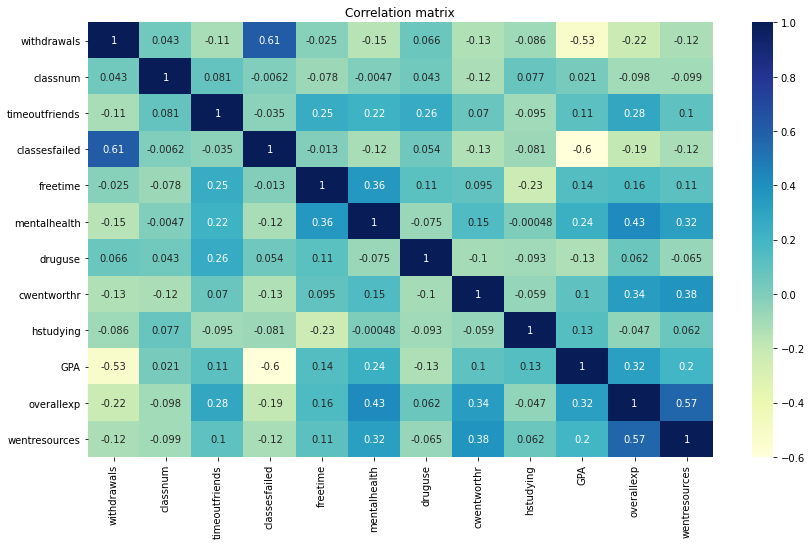

In [ ]:
#Compute Correlation Matrix Heatmap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

plt.figure(figsize = (14, 8))
plt.title('Correlation matrix')

corrPD=dfr.toPandas()
#corrPD=df3.toPandas()
dataplot=sb.heatmap(corrPD.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [ ]:
dfr.printSchema()

#V1
#dfr = dfr.drop("timestamp","age","gender","gradyear","major","minor","collegechoice","exercise","employed","coops",\
               #"extracurricular","firstgen","terms","sleep","vaccinated","timeoutfriends")
#V2
#dfr = dfr.drop("timestamp","age","gender","gradyear","major","minor","collegechoice","exercise","coops",\
               #"extracurricular","firstgen","terms","vaccinated")
#V3
dfr = dfr.drop("timestamp","age","gender","gradyear","major","minor","coops",\
               "firstgen","terms","vaccinated")



dfr.printSchema()

dfr.describe().show()

dfr=dfr.dropna()

root
 |-- timestamp: string (nullable = true)
 |-- terms: string (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- gradyear: string (nullable = true)
 |-- major: string (nullable = true)
 |-- minor: string (nullable = true)
 |-- withdrawals: integer (nullable = true)
 |-- collegechoice: string (nullable = true)
 |-- firstgen: string (nullable = true)
 |-- campusliving: string (nullable = true)
 |-- exercise: string (nullable = true)
 |-- sleep: string (nullable = true)
 |-- employed: string (nullable = true)
 |-- coops: string (nullable = true)
 |-- extracurricular: string (nullable = true)
 |-- classnum: integer (nullable = true)
 |-- timeoutfriends: integer (nullable = true)
 |-- vaccinated: string (nullable = true)
 |-- classesfailed: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- mentalhealth: integer (nullable = true)
 |-- druguse: integer (nullable = true)
 |-- cwentworthr: integer (nullable = true)
 |-- hstud

In [ ]:
#Verifying all Categorical Columns
cols = dfr.columns
cols

categoricalColumns = [item[0] for item in dfr.dtypes if item[1].startswith('string')]
categoricalColumns



['collegechoice',
 'campusliving',
 'exercise',
 'sleep',
 'employed',
 'extracurricular']

In [ ]:
#Verifying all Numeric Columns
numericColumns = [item[0] for item in dfr.dtypes if item[1].startswith('int')]
numericColumns

['withdrawals',
 'classnum',
 'timeoutfriends',
 'classesfailed',
 'freetime',
 'mentalhealth',
 'druguse',
 'cwentworthr',
 'hstudying',
 'overallexp',
 'wentresources']

In [ ]:
#Prep data by converting necessary categorical values to numerical 

#StringIndexer converts strings to indexes 0-n with 0 being most frequent occurence
#OneHotEncoder maps these label indices to a binary vector
#VectorAssembler puts all features into one column vector 'features'
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

stages=[]
for categoricalCol in categoricalColumns:
  stringIndexer= StringIndexer(inputCol= categoricalCol, outputCol= categoricalCol + 'Index')
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
  stages +=[stringIndexer, encoder]

assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericColumns
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]




In [ ]:
#Pipeline which holds stringIndexer, oneHotEncoder, and vectorAssembler to simplify the process.
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(dfr)
dfr = pipelineModel.transform(dfr)
selectedCols = ['features'] + cols
dfr = dfr.select(selectedCols)
dfr.printSchema()

root
 |-- features: vector (nullable = true)
 |-- withdrawals: integer (nullable = true)
 |-- collegechoice: string (nullable = true)
 |-- campusliving: string (nullable = true)
 |-- exercise: string (nullable = true)
 |-- sleep: string (nullable = true)
 |-- employed: string (nullable = true)
 |-- extracurricular: string (nullable = true)
 |-- classnum: integer (nullable = true)
 |-- timeoutfriends: integer (nullable = true)
 |-- classesfailed: integer (nullable = true)
 |-- freetime: integer (nullable = true)
 |-- mentalhealth: integer (nullable = true)
 |-- druguse: integer (nullable = true)
 |-- cwentworthr: integer (nullable = true)
 |-- hstudying: integer (nullable = true)
 |-- GPA: double (nullable = true)
 |-- overallexp: integer (nullable = true)
 |-- wentresources: integer (nullable = true)



In [ ]:
#Prep features/output Dataframe to pass to Linear Regression Model
finalDF = dfr.select('features','GPA')
finalDF.show(truncate=False)

+-----------------------------------------------------------------------------------+----+
|features                                                                           |GPA |
+-----------------------------------------------------------------------------------+----+
|[1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,4.0,3.0,1.0,4.0,4.0,0.0,6.0,16.0,8.0,7.0]     |3.49|
|(19,[0,1,3,9,10,12,13,15,16,17,18],[1.0,1.0,1.0,5.0,2.0,3.0,3.0,10.0,30.0,7.0,7.0])|3.9 |
|[1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0,4.0,2.0,7.0,6.0,0.0,6.0,4.0]      |3.7 |
|[1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,4.0,2.0,0.0,3.0,5.0,0.0,8.0,3.0,7.0,8.0]      |3.83|
|[1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,4.0,1.0,3.0,4.0,4.0,7.0,9.0,20.0,9.0,8.0]     |3.5 |
|[1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,0.0,4.0,4.0,6.0,7.0,25.0,7.0,5.0]     |3.89|
|[1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,4.0,0.0,2.0,3.0,5.0,7.0,6.0,6.0,7.0]      |3.87|
|[0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,2.0,1.0,2.0,7.0,12.0,6.0,4.0]     |3.3 |

In [ ]:
#Split into training/test sets
training, test = finalDF.randomSplit([0.6,0.4]) # split 60/40 due to small amount of entries ~350

training.show(truncate=False)

+-----------------------------------------------------------------------------------+----+
|features                                                                           |GPA |
+-----------------------------------------------------------------------------------+----+
|(19,[0,1,3,9,10,12,13,15,16,17,18],[1.0,1.0,1.0,5.0,2.0,3.0,3.0,10.0,30.0,7.0,7.0])|3.9 |
|(19,[0,1,5,9,12,13,14,15,16,17,18],[1.0,1.0,1.0,5.0,3.0,2.0,7.0,4.0,10.0,6.0,3.0]) |3.55|
|(19,[0,1,7,9,10,12,13,15,16,17,18],[1.0,1.0,1.0,4.0,4.0,3.0,4.0,10.0,3.0,8.0,7.0]) |3.5 |
|(19,[0,2,4,5,9,12,13,15,16,17,18],[1.0,1.0,1.0,1.0,4.0,4.0,2.0,9.0,50.0,6.0,8.0])  |4.0 |
|(19,[0,2,5,9,11,12,13,14,15,16,18],[1.0,1.0,1.0,5.0,2.0,2.0,1.0,2.0,8.0,20.0,1.0]) |2.5 |
|(19,[0,2,5,9,12,13,14,15,16,17,18],[1.0,1.0,1.0,5.0,2.0,2.0,3.0,3.0,25.0,4.0,6.0]) |3.0 |
|(19,[0,3,5,8,9,12,13,15,16,17,18],[1.0,1.0,1.0,1.0,4.0,2.0,3.0,4.0,14.0,3.0,5.0])  |3.5 |
|(19,[0,6,9,10,11,12,13,15,16,17,18],[1.0,1.0,5.0,3.0,3.0,3.0,3.0,6.0,4.0,6.0,4.0]) |2.5 |

In [ ]:
#Linear Regression
from pyspark.ml.regression import LinearRegression

lm = LinearRegression(labelCol='GPA',featuresCol='features')

#Fit the model
lrModel = lm.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))

print("*************************************************")

print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary

trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)

print("*************************************************")

print("r2: %f" % trainingSummary.r2)

print("*************************************************")

print("P-Values")
trainingSummary.pValues


Coefficients: [-0.003353913645532976,0.05143370126596716,0.04226504384857807,0.014725312672708771,0.043683338391979826,-0.14549769047388725,-0.13864235051020724,0.04979653845695358,-0.08301672044258528,0.046078673091443395,-0.0070654566367992855,-0.14164378122764912,0.039092446350156046,0.01175877411368946,-0.0214279362880106,-0.006635560467309165,0.0021405459947704164,0.02765478171798493,0.010356522898645644]
*************************************************
Intercept: 3.1720524951175264
+--------------------+
|           residuals|
+--------------------+
| 0.03238638352774048|
|0.062311231934622846|
| -0.3240940698643353|
| 0.23056057173774613|
| -0.5597424911421638|
|  -0.539643165098707|
|   0.109142247659884|
| -0.6429791472949131|
| 0.12320821049359099|
|  0.4167770632032357|
|-0.27981087443923736|
| 0.20851035261790418|
|  0.2237138250816817|
|-0.26172357074898267|
| -0.3300609767915459|
| 0.09697238655548635|
| 0.02168535052961662|
|-0.18544058141666353|
|-0.27213752454460227|


[0.9864099851228261,
 0.2971025696267855,
 0.5036901482313967,
 0.8235541473661117,
 0.3743459866186196,
 0.1201458537678417,
 0.14968255756647042,
 0.31183271980378247,
 0.00020913627054297557,
 0.3098685874746403,
 0.714942743880919,
 3.867706859228548e-07,
 0.10653351610949224,
 0.6173244970138316,
 0.06396846022960001,
 0.5021327673586922,
 0.25126102791820926,
 0.046429031928494124,
 0.4231655535444383,
 0.0]

In [ ]:
#Measure the models efficiency over the testing set and evaluate compared to the training set
lrPredictions= lrModel.transform(test)
lrPredictions.select("prediction","GPA","features").show(20, truncate=False)

from pyspark.ml.evaluation import RegressionEvaluator
lrEvaluator=RegressionEvaluator(predictionCol="prediction", \
                                labelCol="GPA", metricName="r2")

print("R Squared (R2) on test set = %g" % lrEvaluator.evaluate(lrPredictions))

+------------------+----+------------------------------------------------------------------------------------+
|prediction        |GPA |features                                                                            |
+------------------+----+------------------------------------------------------------------------------------+
|3.8997083434299826|4.0 |(19,[0,1,2,9,10,12,13,15,16,17,18],[1.0,1.0,1.0,4.0,1.0,3.0,3.0,10.0,10.0,9.0,10.0])|
|3.69520044283393  |4.0 |(19,[0,1,3,6,9,12,13,15,16,17,18],[1.0,1.0,1.0,1.0,5.0,4.0,4.0,7.0,2.0,6.0,4.0])    |
|3.419260006841021 |3.3 |(19,[0,2,5,9,11,12,13,15,16,17,18],[1.0,1.0,1.0,3.0,1.0,2.0,2.0,7.0,20.0,6.0,9.0])  |
|3.66534598210939  |4.0 |(19,[0,2,9,12,13,14,15,16,17,18],[1.0,1.0,2.0,2.0,2.0,3.0,10.0,10.0,10.0,9.0])      |
|3.6072224384056786|2.92|(19,[0,3,6,8,9,12,13,15,16,17,18],[1.0,1.0,1.0,1.0,4.0,4.0,3.0,10.0,10.0,8.0,9.0])  |
|3.824571685887923 |4.0 |(19,[0,3,9,10,12,13,14,15,17,18],[1.0,1.0,4.0,1.0,5.0,3.0,5.0,6.0,10.0,10.0])       |
|

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor

train_b = training.select('features', training.GPA.alias('label'))


dt = DecisionTreeRegressor()
model = dt.fit(train_b)
testDt=model.transform(test)

testDt=testDt.select('features', 'prediction',testDt.GPA.alias('label'))
testDt.show(truncate=False)

+------------------------------------------------------------------------------------+------------------+-----+
|features                                                                            |prediction        |label|
+------------------------------------------------------------------------------------+------------------+-----+
|(19,[0,1,2,9,10,12,13,15,16,17,18],[1.0,1.0,1.0,4.0,1.0,3.0,3.0,10.0,10.0,9.0,10.0])|3.788372093023256 |4.0  |
|(19,[0,1,3,6,9,12,13,15,16,17,18],[1.0,1.0,1.0,1.0,5.0,4.0,4.0,7.0,2.0,6.0,4.0])    |3.677142857142857 |4.0  |
|(19,[0,2,5,9,11,12,13,15,16,17,18],[1.0,1.0,1.0,3.0,1.0,2.0,2.0,7.0,20.0,6.0,9.0])  |3.788372093023256 |3.3  |
|(19,[0,2,9,12,13,14,15,16,17,18],[1.0,1.0,2.0,2.0,2.0,3.0,10.0,10.0,10.0,9.0])      |3.0199999999999996|4.0  |
|(19,[0,3,6,8,9,12,13,15,16,17,18],[1.0,1.0,1.0,1.0,4.0,4.0,3.0,10.0,10.0,8.0,9.0])  |3.788372093023256 |2.92 |
|(19,[0,3,9,10,12,13,14,15,17,18],[1.0,1.0,4.0,1.0,5.0,3.0,5.0,6.0,10.0,10.0])       |3.7010344827586206

In [ ]:
#Evaluate the models performance
evaluator = RegressionEvaluator()

print("R2:")
print(evaluator.evaluate(testDt,
{evaluator.metricName: "r2"})
)

print(" ")
print("MSE:")
print(evaluator.evaluate(testDt,
{evaluator.metricName: "mse"})
)

print(" ")
print("RMSE:")
print(evaluator.evaluate(testDt,
{evaluator.metricName: "rmse"})
)

#Regression Tree performs worse than the Linear Regression Model

R2:
-0.10301341918030715
 
MSE:
0.17159491971324062
 
RMSE:
0.4142401715348725
